In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Pre_data = pd.read_csv("C:\\Users\\2019A00303\\Desktop\\Code\\Airbnb Project\\Data\\PreProcessingFrance.csv")
Pre_data

,Unnamed: 0,Host Since,Country,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,...,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,Day,Month
0,5214,2016-07-08,France,46.191839,6.208599,2.0,1.0,1.0,1.0,39.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4,7
1,14626,2015-05-03,France,48.882926,2.335813,2.0,1.0,0.0,1.0,80.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6,5
2,14627,2012-06-24,France,48.883013,2.343469,2.0,1.0,0.0,1.0,65.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6,6
3,14628,2015-04-01,France,48.884043,2.340604,2.0,1.0,1.0,1.0,41.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,4
4,14630,2015-08-28,France,48.885195,2.345101,2.0,1.0,1.0,1.0,50.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42349,493308,2013-06-13,France,48.858702,2.327786,3.0,1.0,1.0,2.0,245.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,6
42350,493309,2014-03-21,France,48.858121,2.306002,2.0,1.0,1.0,2.0,70.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4,3
42351,493310,2013-09-07,France,48.852896,2.325696,5.0,2.5,2.0,3.0,400.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5,9
42352,493312,2015-06-05,France,48.858549,2.316800,3.0,1.0,2.0,3.0,99.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4,6


<AxesSubplot:ylabel='Frequency'>

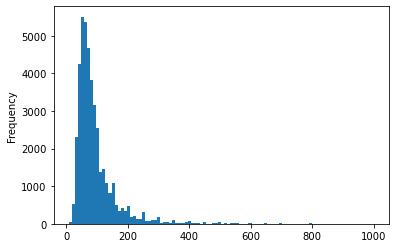

In [3]:
Pre_data['Price'].plot(kind='hist', bins=100)

In [4]:
Pre_data['group'] = pd.cut(x=Pre_data['Price'],
bins=[0, 50, 100, 150, 200, 1000],
labels=['group_1','group_2','group_3','group_4','group_5'])
Pre_data.head()

,Unnamed: 0,Host Since,Country,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,...,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,Day,Month,group
0,5214,2016-07-08,France,46.191839,6.208599,2.0,1.0,1.0,1.0,39.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4,7,group_1
1,14626,2015-05-03,France,48.882926,2.335813,2.0,1.0,0.0,1.0,80.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6,5,group_2
2,14627,2012-06-24,France,48.883013,2.343469,2.0,1.0,0.0,1.0,65.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6,6,group_2
3,14628,2015-04-01,France,48.884043,2.340604,2.0,1.0,1.0,1.0,41.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,4,group_1
4,14630,2015-08-28,France,48.885195,2.345101,2.0,1.0,1.0,1.0,50.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4,8,group_1


In [5]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(Pre_data, Pre_data["group"]):
    train = Pre_data.loc[train_index]
    test = Pre_data.loc[test_index]

In [6]:
train['group'].value_counts() / len(train)

group_2    0.508928
group_1    0.243131
group_3    0.143199
group_5    0.054127
group_4    0.050615
Name: group, dtype: float64

In [7]:
test['group'].value_counts() / len(test)

group_2    0.508913
group_1    0.243065
group_3    0.143194
group_5    0.054185
group_4    0.050643
Name: group, dtype: float64

In [8]:
train.drop('group', axis=1, inplace=True)
train.head()

,Unnamed: 0,Host Since,Country,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,...,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,Day,Month
7078,99984,2014-09-30,France,48.873682,2.304387,3.0,1.0,1.0,2.0,120.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,9
36863,460298,2014-08-04,France,48.871686,2.391531,5.0,1.0,1.0,3.0,55.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,8
12835,164060,2014-07-21,France,48.886756,2.373412,1.0,1.0,1.0,1.0,55.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,7
6247,98880,2015-10-04,France,48.861272,2.381624,4.0,1.0,1.0,2.0,57.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6,10
23629,330430,2014-12-16,France,48.841662,2.288914,2.0,1.0,1.0,1.0,49.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,12


In [9]:
test.drop(['Unnamed: 0','group', 'Host Since', 'Country', 'Airbed', 'Couch', 'Futon', 'Pull-out Sofa', 'Real Bed', 'Cleaning Fee'], axis=1, inplace=True)
test.head()

,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Entire home/apt,Private room,Shared room,Day,Month
10112,48.891235,2.331918,4.0,1.0,1.0,2.0,65.0,1.0,0.0,4.0,1125.0,1.0,1.0,0.0,0.0,2,12
27585,48.869421,2.401577,4.0,1.0,1.0,2.0,60.0,1.0,0.0,1.0,1125.0,1.0,1.0,0.0,0.0,6,7
38424,48.860274,2.349453,2.0,1.0,1.0,1.0,80.0,1.0,0.0,1.0,3.0,143.0,0.0,1.0,0.0,0,1
40962,48.886743,2.326721,3.0,1.0,0.0,1.0,68.0,1.0,0.0,3.0,8.0,2.0,1.0,0.0,0.0,6,3
8824,48.846499,2.320718,5.0,1.5,2.0,3.0,150.0,1.0,0.0,5.0,1125.0,1.0,1.0,0.0,0.0,0,3


In [10]:
train_y = train[['Price']]
train_y.head()

,Price
7078,120.0
36863,55.0
12835,55.0
6247,57.0
23629,49.0


In [11]:
train.drop(['Unnamed: 0', 'Price', 'Host Since', 'Country','Airbed', 'Couch', 'Futon', 'Pull-out Sofa', 'Real Bed', 'Cleaning Fee'], axis=1, inplace=True)
train_X = train
train_X.head()

,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Entire home/apt,Private room,Shared room,Day,Month
7078,48.873682,2.304387,3.0,1.0,1.0,2.0,1.0,0.0,3.0,1125.0,4.0,1.0,0.0,0.0,1,9
36863,48.871686,2.391531,5.0,1.0,1.0,3.0,2.0,10.0,2.0,30.0,21.0,1.0,0.0,0.0,0,8
12835,48.886756,2.373412,1.0,1.0,1.0,1.0,1.0,0.0,2.0,62.0,2.0,0.0,1.0,0.0,0,7
6247,48.861272,2.381624,4.0,1.0,1.0,2.0,1.0,0.0,1.0,1125.0,8.0,1.0,0.0,0.0,6,10
23629,48.841662,2.288914,2.0,1.0,1.0,1.0,1.0,10.0,3.0,1125.0,6.0,0.0,1.0,0.0,1,12


In [12]:
test_y= test[['Price']]
test_y.head()

,Price
10112,65.0
27585,60.0
38424,80.0
40962,68.0
8824,150.0


In [13]:
test.drop('Price', axis=1, inplace=True)
test_X = test
test_X.head()

,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Entire home/apt,Private room,Shared room,Day,Month
10112,48.891235,2.331918,4.0,1.0,1.0,2.0,1.0,0.0,4.0,1125.0,1.0,1.0,0.0,0.0,2,12
27585,48.869421,2.401577,4.0,1.0,1.0,2.0,1.0,0.0,1.0,1125.0,1.0,1.0,0.0,0.0,6,7
38424,48.860274,2.349453,2.0,1.0,1.0,1.0,1.0,0.0,1.0,3.0,143.0,0.0,1.0,0.0,0,1
40962,48.886743,2.326721,3.0,1.0,0.0,1.0,1.0,0.0,3.0,8.0,2.0,1.0,0.0,0.0,6,3
8824,48.846499,2.320718,5.0,1.5,2.0,3.0,1.0,0.0,5.0,1125.0,1.0,1.0,0.0,0.0,0,3


In [14]:
# from sklearn.linear_model import LinearRegression

# l_reg = LinearRegression()
# l_reg.fit(train_X, train_y)

In [15]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np

# predictions = l_reg.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [16]:
# predictions = l_reg.predict(test_X)
# mse = mean_squared_error(test_y, predictions)
# mae = mean_absolute_error(test_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [17]:
# from sklearn.tree import DecisionTreeRegressor

# d_reg = DecisionTreeRegressor()
# d_reg.fit(train_X, train_y)

In [18]:
# predictions = d_reg.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [19]:
# predictions = d_reg.predict(test_X)
# mse = mean_squared_error(test_y, predictions)
# mae = mean_absolute_error(test_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [20]:
# from sklearn.svm import SVR

# svr = SVR()
# svr.fit(train_X, train_y)

In [21]:
# predictions = svr.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [22]:
# predictions = svr.predict(test_X)
# mse = mean_squared_error(test_y, predictions)
# mae = mean_absolute_error(test_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [23]:
# from sklearn.neighbors import KNeighborsRegressor
# knn = KNeighborsRegressor()
# knn.fit(train_X, train_y)

In [24]:
# predictions = knn.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [25]:
# predictions = knn.predict(test_X)
# mse = mean_squared_error(test_y, predictions)
# mae = mean_absolute_error(test_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [26]:
# from sklearn.neural_network import MLPRegressor

# ann = MLPRegressor()
# ann.fit(train_X, train_y)

In [27]:
# predictions = ann.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [28]:
# predictions = ann.predict(test_X)
# mse = mean_squared_error(test_y, predictions)
# mae = mean_absolute_error(test_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [29]:
from sklearn.ensemble import RandomForestRegressor

r_reg = RandomForestRegressor()
r_reg.fit(train_X, train_y)

C:\Users\2019A0~1\AppData\Local\Temp/ipykernel_17248/806139679.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  r_reg.fit(train_X, train_y)


RandomForestRegressor()

Text(0.5, 0, 'Relative Importance')

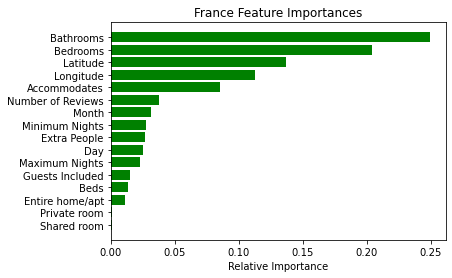

In [30]:
features = train_X.columns
importances = r_reg.feature_importances_
indices = np.argsort(importances)

plt.title('France Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

In [31]:
# predictions = r_reg.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [32]:
# from sklearn.model_selection import GridSearchCV

# param = {'n_estimators' : [800,900,1000], 'max_features' : ['sqrt','auto','log2'], 'max_depth' : [8,9,10],
#          'min_samples_split': [2,3,4]}

# r_reg = RandomForestRegressor(random_state=42)

# search = GridSearchCV(r_reg, param, cv=5,
#                       scoring='neg_mean_absolute_error')
                      
# search.fit(train_X, train_y['Price'].ravel())

In [33]:
# from sklearn.ensemble import RandomForestRegressor

# r_reg = RandomForestRegressor(bootstrap=True,
#                               min_samples_split=2,
#                               criterion='mse',
#                               max_depth=None,
#                               max_features='auto',
#                               n_estimators=1000,
#                               random_state=42,
#                               )
# r_reg.fit(train_X, train_y['Price'].ravel())

In [34]:
# predictions = r_reg.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)